In [1]:
#importing necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("file.csv")   # importing dataset

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [6]:
df.shape

(1156, 7)

In [7]:
df.isnull().sum()  #checking for total Null values 

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [8]:
df[df.duplicated()]  #checking for Duplicated values

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [9]:
df.drop_duplicates(inplace=True)    #Removing Duplicated values

In [10]:
df.drop(df.index[[492,491,751,761,798,807]],inplace=True)    # Removing values with same Start time and stop time

In [11]:
df["START_DATE*"]=pd.to_datetime(df["START_DATE*"],errors="coerce")
df["END_DATE*"]=pd.to_datetime(df["END_DATE*"],errors="coerce")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1148 non-null   datetime64[ns]
 1   END_DATE*    1148 non-null   datetime64[ns]
 2   CATEGORY*    1148 non-null   object        
 3   START*       1148 non-null   object        
 4   STOP*        1148 non-null   object        
 5   MILES*       1149 non-null   float64       
 6   PURPOSE*     651 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 71.8+ KB


In [13]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [14]:
df.columns=['START_DATE','END_DATE','CATEGORY','START','STOP','MILES','PURPOSE']  #renaming columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1148 non-null   datetime64[ns]
 1   END_DATE    1148 non-null   datetime64[ns]
 2   CATEGORY    1148 non-null   object        
 3   START       1148 non-null   object        
 4   STOP        1148 non-null   object        
 5   MILES       1149 non-null   float64       
 6   PURPOSE     651 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 71.8+ KB


<Axes: xlabel='CATEGORY', ylabel='count'>

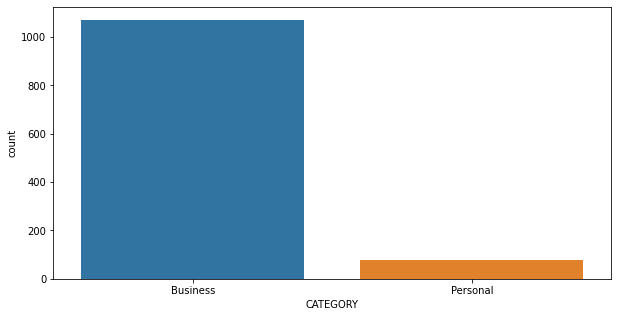

In [16]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot(df['CATEGORY'])

In [17]:
start_labels=df.START.value_counts().nlargest(10)
start_labels

Cary                200
Unknown Location    146
Morrisville          85
Whitebridge          68
Islamabad            56
Lahore               36
Durham               35
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

In [18]:
stop_labels = df.STOP.value_counts().nlargest(10)
stop_labels

Cary                201
Unknown Location    146
Morrisville          83
Whitebridge          65
Islamabad            57
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

Text(0, 0.5, 'Value Counts')

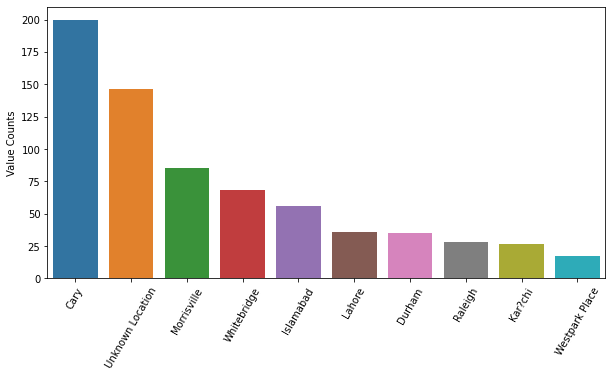

In [19]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sns.barplot(start_labels.index,start_labels)
plt.ylabel('Value Counts')

Text(0, 0.5, 'Value Counts')

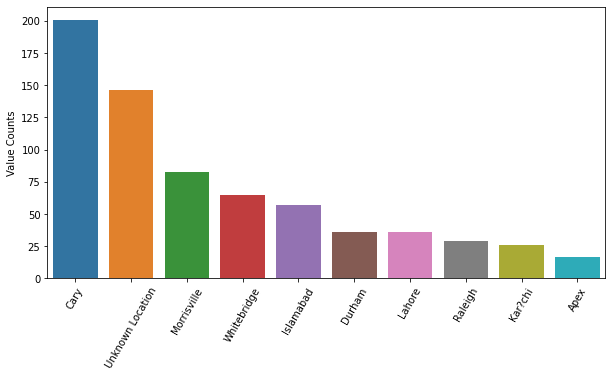

In [20]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sns.barplot(stop_labels.index,stop_labels)
plt.ylabel('Value Counts')

In [21]:
df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month
df['MONTH']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
1151    12.0
1152    12.0
1153    12.0
1154    12.0
1155     NaN
Name: MONTH, Length: 1149, dtype: float64

In [22]:
month_labels={1.0:"Jan",2.0:'Feb',3.0:'March',4.0:'April',5.0:"May",6.0:'June',7.0:"July",8.0:'August',9.0:"Sept",
              10.0:'Oct',11.0:'Nov',12.0:'Dec'}

In [23]:
df["MONTH"]=df.MONTH.map(month_labels)
df['MONTH'].unique()

array(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August',
       'Sept', 'Oct', 'Nov', 'DEc', nan], dtype=object)

In [24]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan


In [25]:
month_count=df.MONTH.value_counts()
month_count

DEc       146
August    133
Nov       122
Feb       115
March     113
July      112
June      105
Oct       104
Jan        61
April      54
May        49
Sept       34
Name: MONTH, dtype: int64

<Axes: ylabel='MONTH'>

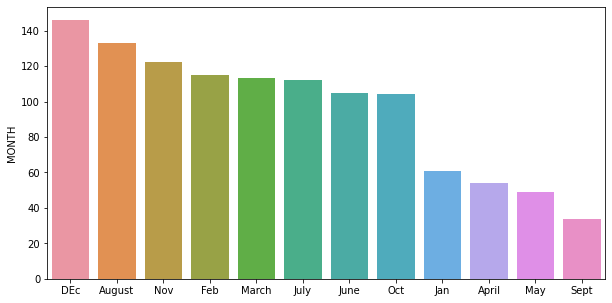

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(month_count.index,month_count)

In [27]:
miles={}
for i in df.MILES:
    if i<10:
        if '0-10 miles' not in miles:
            miles["0-10 miles"]= [i]
        else:
            miles['0-10 miles'].append(i)
    elif i>=10 and i<20:
        if "10-20 miles" not in miles:
            miles['10-20 miles']=[i]
        else:
            miles['10-20 miles'].append(i)
    elif i>=20 and i<30:
        if "20-30 miles" not in miles:
            miles['20-30 miles']=[i]
        else:
            miles['20-30 miles'].append(i)
    elif i>=30 and i<40:
        if "30-40 miles" not in miles:
            miles['30-40 miles']=[i]
        else:
            miles['30-40 miles'].append(i)
    elif i>=40 and i<50:
        if "40-50 miles" not in miles:
            miles['40-50 miles']=[i]
        else:
            miles['40-50 miles'].append(i)
    else:
        if "Above 50 miles" not in miles:
            miles['Above 50 miles']=[i]
        else:
            miles['Above 50 miles'].append(i)

In [28]:
len_miles=[]
for key in miles:
    len_miles.append((key,len(miles[key])))

In [29]:
a,b=[],[]
for i,j in len_miles:
    a.append(i)
    b.append(j)

<Axes: >

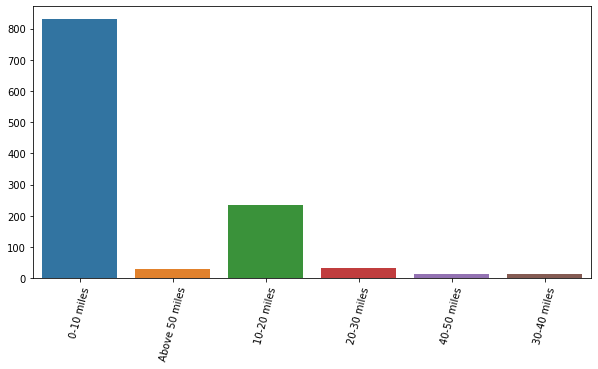

In [30]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
sns.barplot(a,b)

In [31]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan


In [32]:
time=pd.to_datetime(["18:00:00"]).time

In [33]:
def check_time(tim):
    if time>tim:
        tim='DAY RIDE'
    else:
        tim="NIGHT RIDE"

In [34]:
df['DAY/NIGHT']=df.apply(lambda x: 'NIGHT RIDE' if pd.notna(x['START_DATE']) and pd.Timestamp(x['START_DATE']).time() > time
                         else 'DAY RIDE',axis=1)

In [35]:
day_night=df['DAY/NIGHT'].value_counts()
day_night

DAY RIDE      814
NIGHT RIDE    335
Name: DAY/NIGHT, dtype: int64

<Axes: ylabel='DAY/NIGHT'>

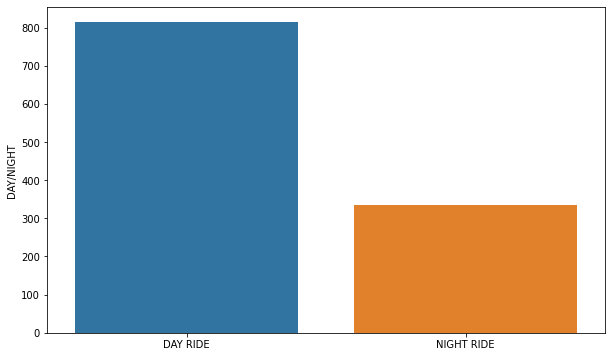

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(day_night.index,day_night)


In [37]:
df['DAY']=df.START_DATE.dt.weekday

In [38]:
day_label={0.0:'Monday',1.0:'Tuesday',2.0:'Wednessday',3.0:'Thursday',4.0:'Friday',5.0:'Saturday',6.0:'Sunday'}
df['DAY']=df['DAY'].map(day_label)

In [39]:
day=df.DAY.value_counts()
day

Friday        206
Tuesday       174
Monday        174
Thursday      153
Saturday      148
Sunday        147
Wednessday    146
Name: DAY, dtype: int64

In [40]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH,DAY/NIGHT,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,NIGHT RIDE,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Jan,DAY RIDE,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,NIGHT RIDE,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,DAY RIDE,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,DAY RIDE,Wednessday


<Axes: ylabel='DAY'>

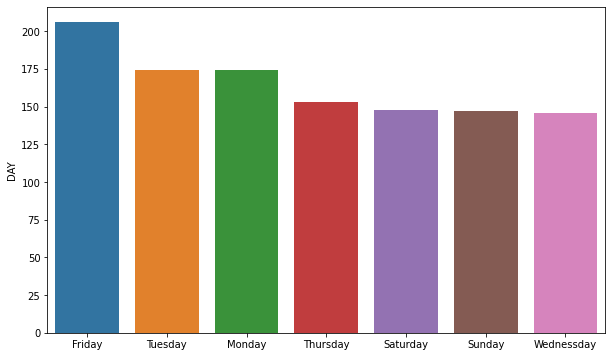

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(day.index,day)

<Axes: xlabel='DAY', ylabel='count'>

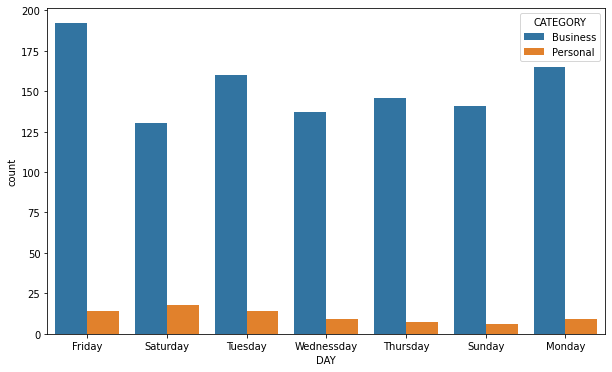

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(hue='CATEGORY' ,x ='DAY' , data=df)